In [6]:
# LightGBM to predict responder6

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset from Parquet
data_path = "../data/processed/day0_data_cleaned_finalcode.parquet"
day0_data_cleaned = pd.read_parquet(data_path)

# Define features (X) and target (y)
X = day0_data_cleaned.drop(columns=["responder_6"])  # Drop the target column
y = day0_data_cleaned["responder_6"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to confirm
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (1555368, 56)
Testing Features Shape: (388842, 56)
Training Target Shape: (1555368,)
Testing Target Shape: (388842,)


In [8]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize the LightGBM model
lgb_model = LGBMRegressor(
    n_estimators=500,  # Number of trees
    learning_rate=0.05,  # Step size
    max_depth=7,  # Depth of each tree
    subsample=0.8,  # Subsample ratio
    colsample_bytree=0.8,  # Feature selection ratio per tree
    random_state=42,  # Ensures reproducibility
    n_jobs=-1  # Use all available CPU cores
)

print("Starting LightGBM Training...")

# Train the model
lgb_model.fit(X_train, y_train)

print("LightGBM Training Complete!")

Starting LightGBM Training...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706
LightGBM Training Complete!


In [9]:
# Make predictions
y_pred = lgb_model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.6821900329839531
Test RMSE: 0.8259479602153837
Test MAE: 0.5423586431878438
Test R²: 0.10170620416475773


In [11]:
# very low performance: the model only explains 10% of the variance

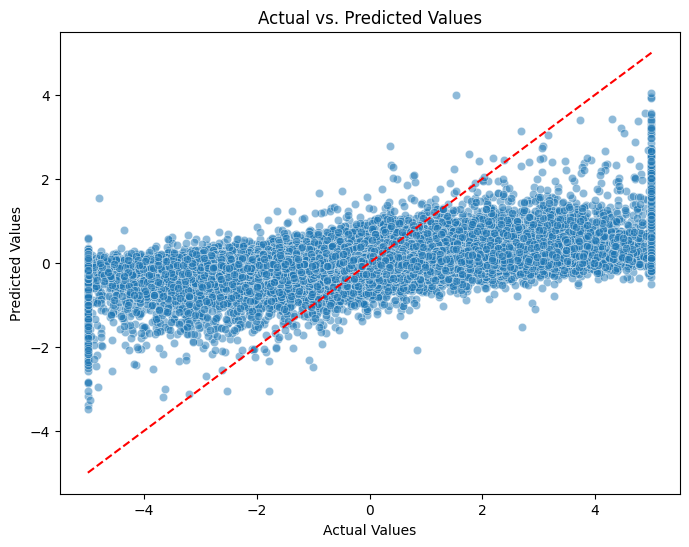

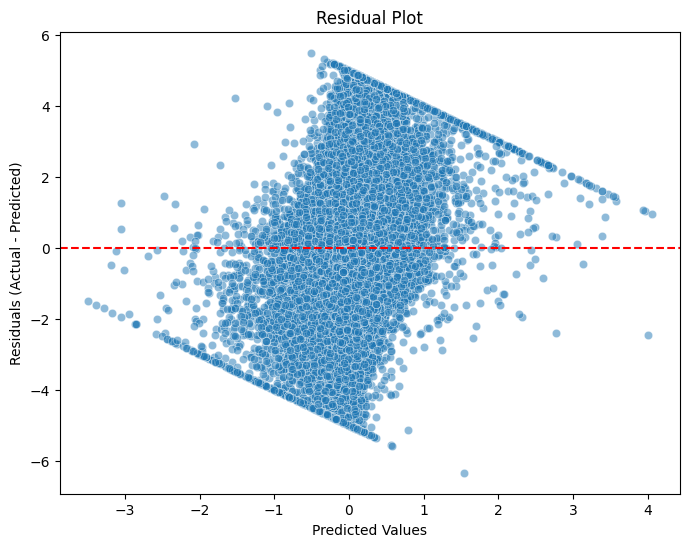

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual Plot: Errors vs. Predicted
residuals = y_test - y_pred  # Calculate residuals

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Ideal zero-error line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np

# Define the model
lgb_model = lgb.LGBMRegressor()

# Define the hyperparameter search space
param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'num_leaves': [20, 31, 40, 50, 70, 100],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': np.linspace(0.5, 1.0, 5)
}

# Randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(lgb_model, param_grid, n_iter=20, 
                                   cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=2, random_state=42)

# Run the search
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.416825 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.418342 seconds.
You can set `force_col_wise=true` to remove the overhead.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.416674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

Python(79932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13142
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706
Best Parameters: {'subsample': np.float64(1.0), 'num_leaves': 70, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': np.float64(0.3)}


In [15]:
# Train the model with best parameters

# Import LightGBM
import lightgbm as lgb

# Train the final model with the best parameters
best_lgb_model = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3
)

# Fit the model
best_lgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13142
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

# Print results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.38105929134527716
Test RMSE: 0.6173000010896462
Test MAE: 0.4317440629861273
Test R²: 0.4982289674277778


In [17]:
# The model now explains ~50% of the variance in the target variable (responder 6)

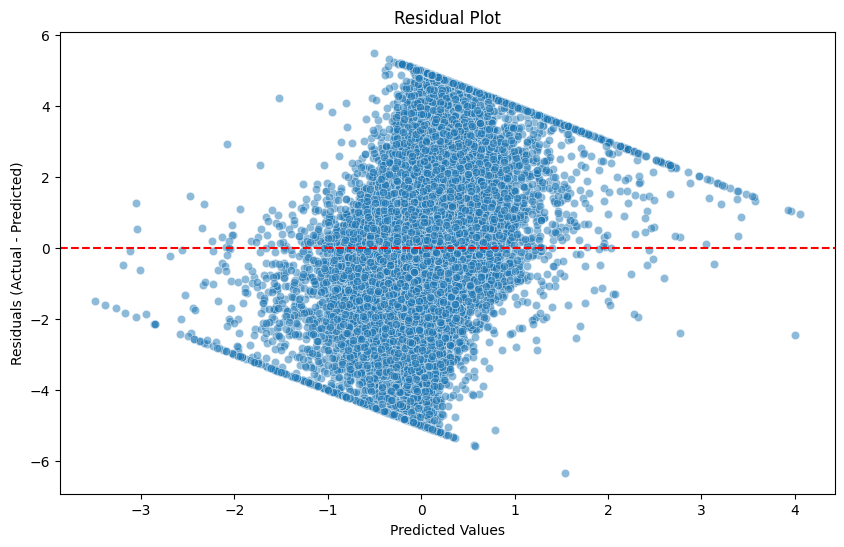

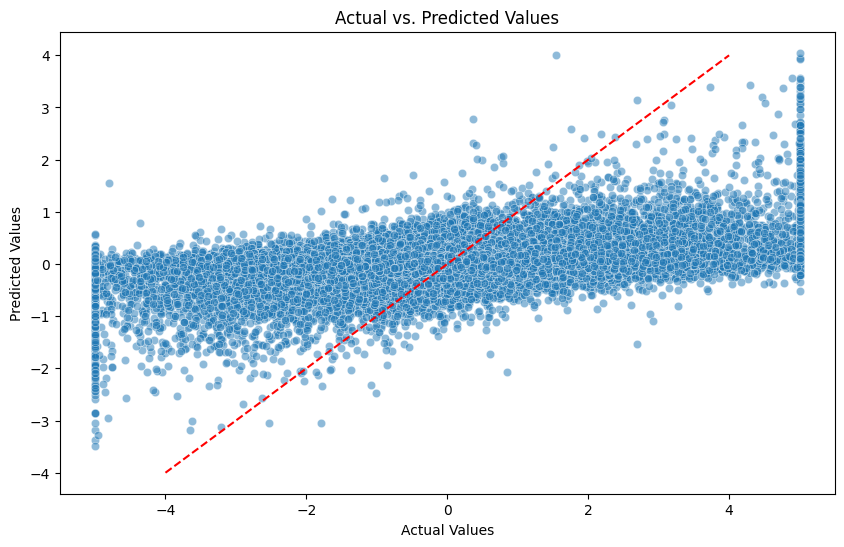

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residual Plot (Actual - Predicted)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([-4, 4], [-4, 4], color='r', linestyle="--")  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_54400/2365040748.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance[:20], palette="viridis")


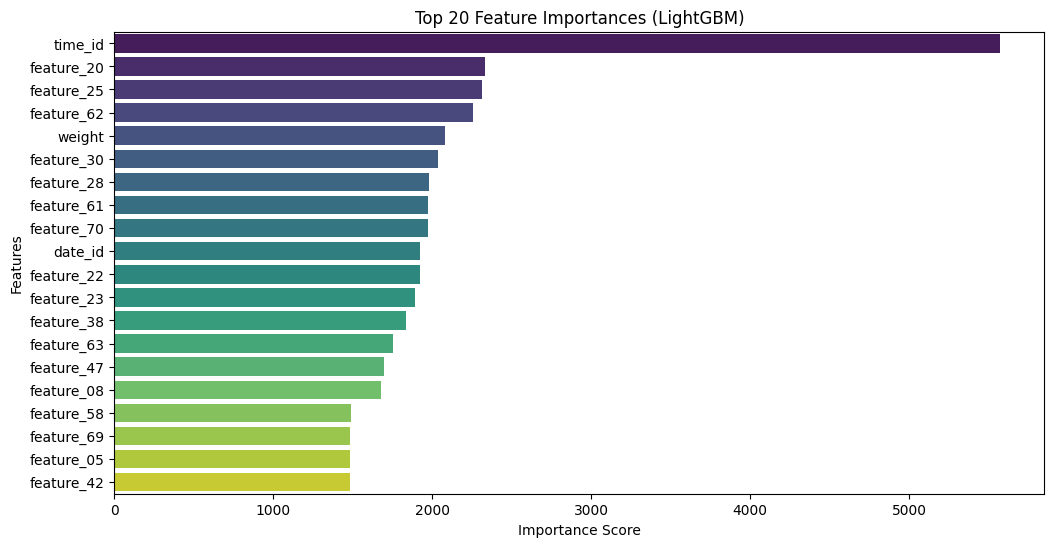

In [19]:
# Feature importance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the trained LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgb_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances (LightGBM)")
plt.show()

/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_54400/3345318124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


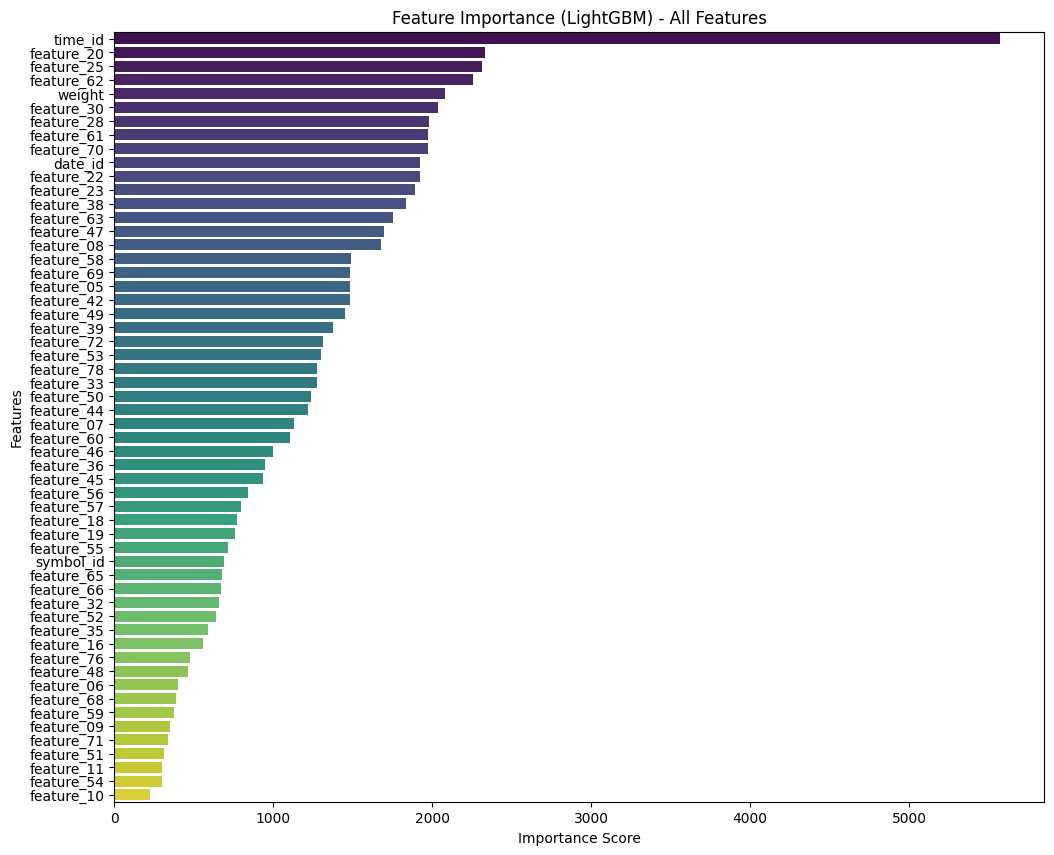

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importances from the LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is used for feature names
    'Importance': best_lgb_model.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot all feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (LightGBM) - All Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [23]:
# Top 20 features excluding non-features

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Remove Non-Feature Columns
non_feature_columns = ["time_id", "weight", "date_id", "symbol_id"]

# Keep only 'feature_' columns
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Ensures only 'feature_' columns
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

print(f"Shape after keeping only 'feature_' columns - Training: {X_train_features.shape}, Testing: {X_test_features.shape}")

# Step 2: Align Feature Importance with Available Features
# Get feature importances from the trained model
trained_feature_names = best_lgb_model.feature_name_  # Extract names from the fitted model
trained_importances = best_lgb_model.feature_importances_

# Ensure we only use importance values for the current dataset's features
feature_importance = pd.DataFrame({
    'Feature': trained_feature_names,
    'Importance': trained_importances
})

# Filter only features that exist in X_train_features
feature_importance = feature_importance[feature_importance["Feature"].isin(X_train_features.columns)]

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Step 3: Select the Top 20 Features
top_20_features = feature_importance.head(20)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top20 = X_train_features[top_20_features]
X_test_top20 = X_test_features[top_20_features]

print(f"New Training Shape (Top 20 Features): {X_train_top20.shape}")
print(f"New Testing Shape (Top 20 Features): {X_test_top20.shape}")

# Step 4: Train the LightGBM Model on the Top 20 Features
lgb_model_top20 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train with only top 20 selected features
lgb_model_top20.fit(X_train_top20, y_train)

# Make predictions
y_pred_top20 = lgb_model_top20.predict(X_test_top20)

# **Step 5: Compute Evaluation Metrics**
mse_20 = mean_squared_error(y_test, y_pred_top20)
rmse_20 = np.sqrt(mse_20)
mae_20 = mean_absolute_error(y_test, y_pred_top20)
r2_20 = r2_score(y_test, y_pred_top20)

# Display results
print(f"Test MSE: {mse_20}")
print(f"Test RMSE: {rmse_20}")
print(f"Test MAE: {mae_20}")
print(f"Test R²: {r2_20}")

Shape after keeping only 'feature_' columns - Training: (1555368, 52), Testing: (388842, 52)
New Training Shape (Top 20 Features): (1555368, 20)
New Testing Shape (Top 20 Features): (388842, 20)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5016
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 20
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.4157412099212914
Test RMSE: 0.6447799701613655
Test MAE: 0.448435035548443
Test R²: 0.4525605308072307


In [25]:
# Top 30 features excluding non-features

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Remove Non-Feature Columns
non_feature_columns = ["time_id", "weight", "date_id", "symbol_id"]

# Keep only 'feature_' columns
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Ensures only 'feature_' columns
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

print(f"Shape after keeping only 'feature_' columns - Training: {X_train_features.shape}, Testing: {X_test_features.shape}")

# Step 2: Align Feature Importance with Available Features
# Get feature importances from the trained model
trained_feature_names = best_lgb_model.feature_name_  # Extract names from the fitted model
trained_importances = best_lgb_model.feature_importances_

# Ensure we only use importance values for the current dataset's features
feature_importance = pd.DataFrame({
    'Feature': trained_feature_names,
    'Importance': trained_importances
})

# Filter only features that exist in X_train_features
feature_importance = feature_importance[feature_importance["Feature"].isin(X_train_features.columns)]

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Step 3: Select the Top 30 Features
top_30_features = feature_importance.head(30)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top30 = X_train_features[top_30_features]
X_test_top30 = X_test_features[top_30_features]

print(f"New Training Shape (Top 30 Features): {X_train_top30.shape}")
print(f"New Testing Shape (Top 30 Features): {X_test_top30.shape}")

# Step 4: Train the LightGBM Model on the Top 30 Features
lgb_model_top30 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train with only top 30 selected features
lgb_model_top30.fit(X_train_top30, y_train)

# Make predictions
y_pred_top30 = lgb_model_top30.predict(X_test_top30)

# **Step 5: Compute Evaluation Metrics**
mse_30 = mean_squared_error(y_test, y_pred_top30)
rmse_30 = np.sqrt(mse_30)
mae_30 = mean_absolute_error(y_test, y_pred_top30)
r2_30 = r2_score(y_test, y_pred_top30)

# Display results
print(f"Test MSE: {mse_30}")
print(f"Test RMSE: {rmse_30}")
print(f"Test MAE: {mae_30}")
print(f"Test R²: {r2_30}")

Shape after keeping only 'feature_' columns - Training: (1555368, 52), Testing: (388842, 52)
New Training Shape (Top 30 Features): (1555368, 30)
New Testing Shape (Top 30 Features): (388842, 30)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7566
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 30
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.40599131838263686
Test RMSE: 0.6371744803290829
Test MAE: 0.4434273298319507
Test R²: 0.4653989873307459


In [26]:
# Top 40 features excluding non-features

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Remove Non-Feature Columns
non_feature_columns = ["time_id", "weight", "date_id", "symbol_id"]

# Keep only 'feature_' columns
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Ensures only 'feature_' columns
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

print(f"Shape after keeping only 'feature_' columns - Training: {X_train_features.shape}, Testing: {X_test_features.shape}")

# Step 2: Align Feature Importance with Available Features
# Get feature importances from the trained model
trained_feature_names = best_lgb_model.feature_name_  # Extract names from the fitted model
trained_importances = best_lgb_model.feature_importances_

# Ensure we only use importance values for the current dataset's features
feature_importance = pd.DataFrame({
    'Feature': trained_feature_names,
    'Importance': trained_importances
})

# Filter only features that exist in X_train_features
feature_importance = feature_importance[feature_importance["Feature"].isin(X_train_features.columns)]

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Step 3: Select the Top 40 Features
top_40_features = feature_importance.head(40)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top40 = X_train_features[top_40_features]
X_test_top40 = X_test_features[top_40_features]

print(f"New Training Shape (Top 40 Features): {X_train_top40.shape}")
print(f"New Testing Shape (Top 40 Features): {X_test_top40.shape}")

# Step 4: Train the LightGBM Model on the Top 40 Features
lgb_model_top40 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train with only top 40 selected features
lgb_model_top40.fit(X_train_top40, y_train)

# Make predictions
y_pred_top40 = lgb_model_top40.predict(X_test_top40)

# **Step 5: Compute Evaluation Metrics**
mse_40 = mean_squared_error(y_test, y_pred_top40)
rmse_40 = np.sqrt(mse_40)
mae_40 = mean_absolute_error(y_test, y_pred_top40)
r2_40 = r2_score(y_test, y_pred_top40)

# Display results
print(f"Test MSE: {mse_40}")
print(f"Test RMSE: {rmse_40}")
print(f"Test MAE: {mae_40}")
print(f"Test R²: {r2_40}")

Shape after keeping only 'feature_' columns - Training: (1555368, 52), Testing: (388842, 52)
New Training Shape (Top 40 Features): (1555368, 40)
New Testing Shape (Top 40 Features): (388842, 40)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10116
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 40
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.4157587284982087
Test RMSE: 0.6447935549446883
Test MAE: 0.4492165427022158
Test R²: 0.4525374627056815


In [27]:
# Top 35 features excluding non-features

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Remove Non-Feature Columns
non_feature_columns = ["time_id", "weight", "date_id", "symbol_id"]

# Keep only 'feature_' columns
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Ensures only 'feature_' columns
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

print(f"Shape after keeping only 'feature_' columns - Training: {X_train_features.shape}, Testing: {X_test_features.shape}")

# Step 2: Align Feature Importance with Available Features
# Get feature importances from the trained model
trained_feature_names = best_lgb_model.feature_name_  # Extract names from the fitted model
trained_importances = best_lgb_model.feature_importances_

# Ensure we only use importance values for the current dataset's features
feature_importance = pd.DataFrame({
    'Feature': trained_feature_names,
    'Importance': trained_importances
})

# Filter only features that exist in X_train_features
feature_importance = feature_importance[feature_importance["Feature"].isin(X_train_features.columns)]

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Step 3: Select the Top 35 Features
top_35_features = feature_importance.head(35)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top35 = X_train_features[top_35_features]
X_test_top35 = X_test_features[top_35_features]

print(f"New Training Shape (Top 35 Features): {X_train_top35.shape}")
print(f"New Testing Shape (Top 35 Features): {X_test_top35.shape}")

# Step 4: Train the LightGBM Model on the Top 35 Features
lgb_model_top35 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train with only top 35 selected features
lgb_model_top35.fit(X_train_top35, y_train)

# Make predictions
y_pred_top35 = lgb_model_top35.predict(X_test_top35)

# **Step 5: Compute Evaluation Metrics**
mse_35 = mean_squared_error(y_test, y_pred_top35)
rmse_35 = np.sqrt(mse_35)
mae_35 = mean_absolute_error(y_test, y_pred_top35)
r2_35 = r2_score(y_test, y_pred_top35)

# Display results
print(f"Test MSE: {mse_35}")
print(f"Test RMSE: {rmse_35}")
print(f"Test MAE: {mae_35}")
print(f"Test R²: {r2_35}")

Shape after keeping only 'feature_' columns - Training: (1555368, 52), Testing: (388842, 52)
New Training Shape (Top 35 Features): (1555368, 35)
New Testing Shape (Top 35 Features): (388842, 35)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8841
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 35
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.40980713077348235
Test RMSE: 0.6401618004641345
Test MAE: 0.4457830305371802
Test R²: 0.4603744041046107


In [30]:
import joblib
import os

# Define the correct path to the existing 'models' directory
model_path = "../models/lgbm_model_top30.pkl"  # Save inside the existing 'models' folder

# Save the trained model
joblib.dump(lgb_model_top30, model_path)

print(f"Model saved successfully at: {model_path}")

Model saved successfully at: ../models/lgbm_model_top30.pkl
